In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data Preparation

1) Load the dataset for the S&P 500
2) Format the date to datetime format
3) Sort values by date from oldest to newest
4) Repeat 1-3 for Nvidia
5) Merge dataframes on the Date column using the S&P 500 as the leading dataframe
6) create log returns
7) Drop missing observations (NaN)


In [12]:

df = pd.read_excel("SPX.xlsx")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

dfNV = pd.read_excel("NVDA.xlsx")
dfNV["Date"] = pd.to_datetime(df["Date"])
dfNV = dfNV.sort_values("Date")

print(df.head())
print(dfNV.head())


df = df.merge(dfNV, how="left", on="Date")

df["returnsSPX"] = (df["SPX"] / df["SPX"].shift(1)) -1
df["returnsNV"] = (df["NVDA"] / df["NVDA"].shift(1)) -1

df.dropna(inplace=True)

print(df.head())

p


        Date      SPX
0 2023-01-03  3824.14
1 2023-01-04  3852.97
2 2023-01-05  3808.10
3 2023-01-06  3895.08
4 2023-01-09  3892.09
        Date    NVDA
0 2023-01-03  14.614
1 2023-01-04  14.315
2 2023-01-05  14.749
3 2023-01-06  14.265
4 2023-01-09  14.859
        Date      SPX    NVDA  returnsSPX  returnsNV
1 2023-01-04  3852.97  14.315    0.007539  -0.020460
2 2023-01-05  3808.10  14.749   -0.011646   0.030318
3 2023-01-06  3895.08  14.265    0.022841  -0.032816
4 2023-01-09  3892.09  14.859   -0.000768   0.041640
5 2023-01-10  3919.25  15.628    0.006978   0.051753


# Descriptive Stats for Log-Returns (both assets)

1) Get initial overview with .describe()

In [13]:
print(df.describe())

                                Date          SPX        NVDA  returnsSPX  \
count                            676   676.000000  676.000000  676.000000   
mean   2024-05-09 09:43:40.118343168  5151.449009   86.401116    0.000856   
min              2023-01-04 00:00:00  3808.100000   14.265000   -0.059750   
25%              2023-09-06 18:00:00  4414.327500   43.959500   -0.003495   
50%              2024-05-08 12:00:00  5216.135000   90.064000    0.000944   
75%              2025-01-10 18:00:00  5837.532500  128.285000    0.005879   
max              2025-09-15 00:00:00  6609.400000  180.000000    0.095154   
std                              NaN   765.608040   45.542021    0.009693   

        returnsNV  
count  676.000000  
mean     0.004220  
min     -0.169682  
25%     -0.013192  
50%      0.002744  
75%      0.021884  
max      0.243696  
std      0.032323  


1) Store means in new variables
2) Store variance in new variables
3) Store standard deviation in new variables
4) Store skewness in new variables
5) Store kurtosis in new variables

In [14]:
meanSPX = df["returnsSPX"].mean()
meanNV = df["returnsNV"].mean()
stdSPX = df["returnsSPX"].std()
stdNV = df["returnsNV"].std()
varSPX = df["returnsSPX"].var()
varNV = df["returnsNV"].var()
skewSPX = df["returnsSPX"].skew()
skewNV = df["returnsNV"].skew()
kurtosisSPX = df["returnsSPX"].kurtosis()
kurtosisNV = df["returnsNV"].kurtosis()

1) Print results for SPX

In [15]:
print(meanSPX,skewSPX,stdSPX,varSPX,kurtosisSPX)

0.0008564578207070749 0.6227933391845882 0.009693465797049201 9.39632791585627e-05 16.09559906969888


1) Print results for NVDA

In [16]:
print(meanNV,skewNV,stdNV,varNV,kurtosisNV)

0.00421973658264987 0.832820775217018 0.032323308749341605 0.0010447962885052635 8.106579099372603


## Visual Observation

1) Plot time series of asset prices / index values for S&P 500 and NVIDIA using a graph with two y-axes
2) Plot the time series of daily log returns of both assets in one graph
3) Create a scatter plot of daily log returns of both assets

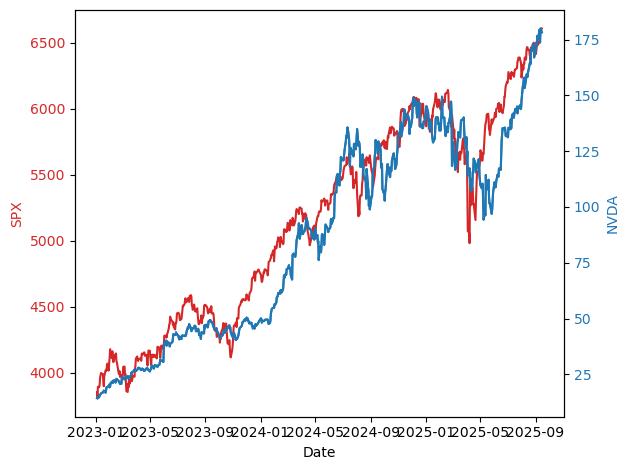

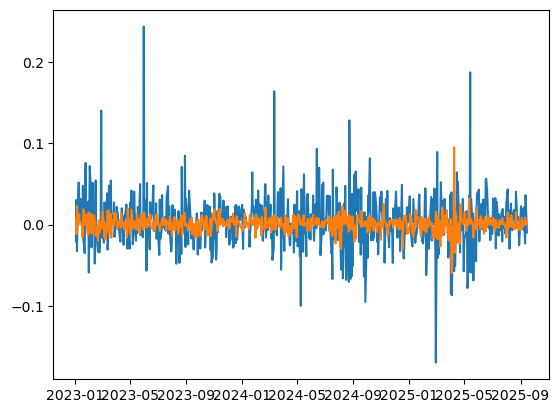

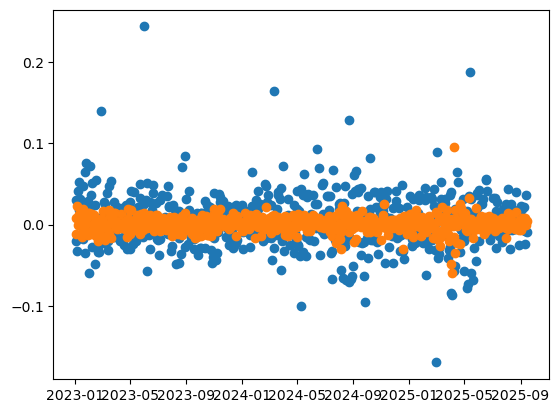

In [17]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('SPX', color=color)
ax1.plot(df['Date'], df['SPX'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'

ax2.set_ylabel('NVDA', color=color)
ax2.plot(df['Date'], df['NVDA'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(df['Date'], df['NVDA'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

plt.plot(df['Date'], df['returnsNV'])
plt.plot(df['Date'], df['returnsSPX'])

plt.show()


plt.scatter(df["Date"], df['returnsNV'])
plt.scatter(df["Date"], df['returnsSPX'])
plt.show()

# OLS Regression

1) Regress log returns of NVDA on log returns of SPX
2) Extract and analyze the results (summary function)

In [18]:
ols = sm.regression.linear_model.OLS(df['returnsNV'], df['returnsSPX']).fit()

print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:              returnsNV   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.1519
Date:                Sat, 20 Sep 2025   Prob (F-statistic):                       0.697
Time:                        00:13:53   Log-Likelihood:                          1355.7
No. Observations:                 676   AIC:                                     -2709.
Df Residuals:                     675   BIC:                                     -2705.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------